# Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset

In [2]:
data=pd.read_excel('iris.xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# 2. Pre-processing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.describe(include='all')

,SL,SW,PL,PW,Classification
count,143.000000,144.000000,144.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.855944,3.049306,3.756250,1.198667,NaN
std,0.828168,0.430644,1.761306,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [5]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

    SL - 7 Nan    Sepal Length
    SW - 6 Nan    Sepal Width
    PL - 6 Nan    Petal Length

## Filling missing values

### a. Sepal Length

<AxesSubplot:xlabel='SL'>

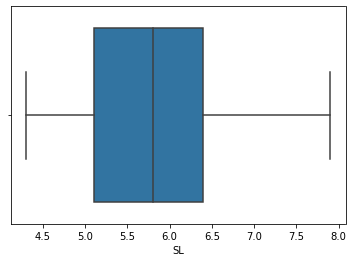

In [6]:
sns.boxplot(x=data['SL'],data=data)

    There are no outliers in the Sepal Length

(array([ 9., 21., 12., 27., 15., 25., 18.,  5.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

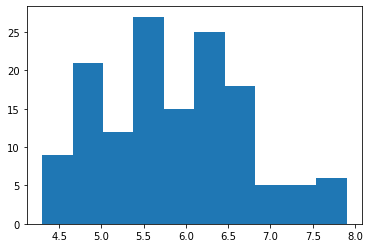

In [7]:
plt.hist(data['SL'])

In [8]:
data['SL']=data['SL'].fillna(data['SL'].median())
data['SL']

0      5.1
1      4.9
2      5.8
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SL, Length: 150, dtype: float64

### b. Sepal WIdth

<AxesSubplot:xlabel='SW'>

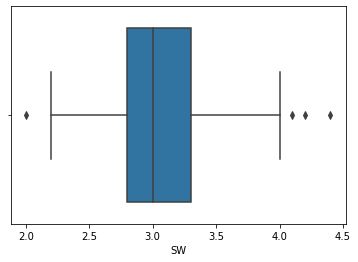

In [9]:
sns.boxplot(x=data['SW'],data=data)

In [10]:
data['SW']=data['SW'].fillna(data['SW'].median())
data['SW']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: SW, Length: 150, dtype: float64

### Outlier Removal

In [11]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [12]:
IQR=Q3-Q1
lowerlimit=Q1-1.5*IQR
upperlimit=Q3+1.5*IQR

In [13]:
print(lowerlimit)
print(upperlimit)

2.1249999999999996
3.9250000000000003


In [14]:
outlier=[]
for x in data['SW']:
    if ((x>upperlimit)or(x<lowerlimit)):
        outlier.append(x)
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [15]:
outlier>upperlimit

array([ True,  True,  True,  True, False])

In [16]:
index1=data['SW']>upperlimit
to_drop=data.loc[index1].index
to_drop

Int64Index([14, 15, 32, 33], dtype='int64')

In [17]:
data.drop(to_drop,inplace=True)

In [18]:
outlier<lowerlimit

array([False, False, False, False,  True])

In [19]:
index1=data['SW']<lowerlimit
to_drop=data.loc[index1].index
to_drop

Int64Index([60], dtype='int64')

In [20]:
data.drop(to_drop,inplace=True)

(array([ 7.,  9., 14., 14., 42., 25.,  5., 16.,  5.,  8.]),
 array([2.2 , 2.37, 2.54, 2.71, 2.88, 3.05, 3.22, 3.39, 3.56, 3.73, 3.9 ]),
 <BarContainer object of 10 artists>)

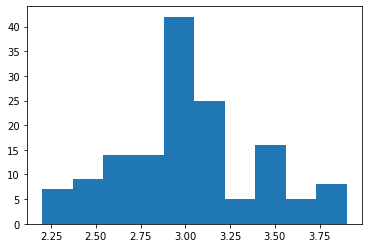

In [21]:
plt.hist(data['SW'])

### c. Petal Length

<AxesSubplot:xlabel='PL'>

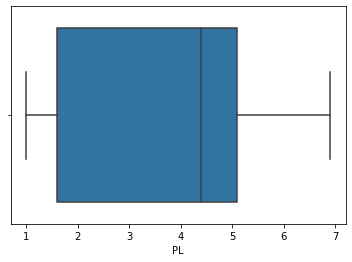

In [22]:
sns.boxplot(x=data['PL'],data=data)

(array([31., 13.,  0.,  3.,  7., 25., 28., 17., 10.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <BarContainer object of 10 artists>)

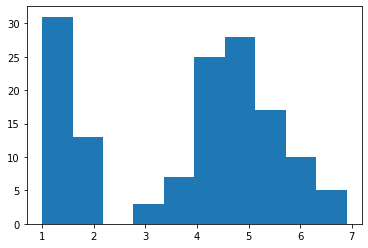

In [23]:
plt.hist(data['PL'])

In [24]:
data['PL']=data['PL'].fillna(data['PL'].median())
data['PL']

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    4.4
148    5.4
149    5.1
Name: PL, Length: 145, dtype: float64

## Check for null values

In [25]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

     All null values filled

In [26]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [27]:
data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [28]:
data['Classification'].value_counts()

Iris-virginica     50
Iris-versicolor    49
Iris-setosa        46
Name: Classification, dtype: int64

# 3. Find out which classification model gives the best result to predict iris species (also do random forest algorithm) 

In [29]:
from sklearn.model_selection import train_test_split
train,test= train_test_split(data,test_size = 0.2,stratify=data['Classification'],random_state=0)

In [30]:
x_train=train[['SL','SW','PL','PW']]
y_train=train.Classification
x_test=test[['SL','SW','PL','PW']]
y_test=test.Classification

### SVM

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
pred=svm_linear.predict(x_test)
print(accuracy_score(y_test,pred))

0.9310344827586207


### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
from sklearn.metrics import f1_score,confusion_matrix
f1_score(y_test,pred,average='macro')

0.9665831244778613

In [33]:
print(accuracy_score(y_test,pred))

0.9655172413793104


In [34]:
confusion_matrix(y_test,pred)

array([[ 9,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]], dtype=int64)

### Findings :

    RandomForest algorithm has an f1_score of 0.966583
    The confusion matrix shows that there are no misclassifications

### Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print(accuracy_score(y_test,pred))

0.9655172413793104


In [36]:
confusion_matrix(y_test,pred)

array([[ 9,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]], dtype=int64)

### Findings :

       DecisionTree classifier gives an accuracy_score of 0.9666
       The confusion matrix shows that there are no misclassifications.

### K-NN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,pred)
    acc_values.append(acc)
acc_values

[0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207]

Text(0, 0.5, 'accuracy')

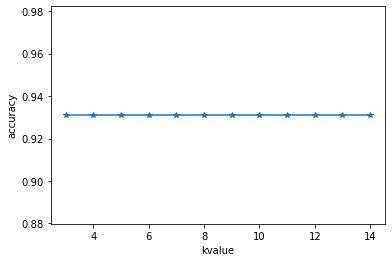

In [38]:
plt.plot(neighbors,acc_values,'*-')
plt.xlabel('kvalue')
plt.ylabel('accuracy')

### Findings :

    From the graph, we see that the highest accuracy is at five different points k=5,6,7.
    So taking one random value among them, k = 5

In [39]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(x_train,y_train)
pred=classifier.predict(x_test)
print(accuracy_score(y_test,pred))

0.9310344827586207


In [40]:
f1_score(y_test,pred,average='macro')

0.9333333333333332

In [41]:
precision_score(y_test,pred,average='macro')

0.9333333333333332

In [42]:
recall_score(y_test,pred,average='macro')

0.9333333333333332

In [43]:
confusion_matrix(y_test,pred)

array([[9, 0, 0],
       [0, 9, 1],
       [0, 1, 9]], dtype=int64)

### Findings :

     The accuracy_score of KNN classifier is 1
     The f1 score is 1
     The precision score is 1
     The recall score is 1
     The confusion matrix shows that there are 2 misclassifications

### Conclusion :

     Linear SVM and KNN Classifiers are the best classification models for this iris dataset